# Decision Trees

In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

%matplotlib inline

## Terminology
Nodes are either root nodes (the first node), interior nodes (follow up questions), or leaf nodes (endpoints). Every node except for leaf nodes contains a __rule__, which is the question we’re asking. The links between nodes are called __branches__ or __paths__. When put in terms of flow, you start at the root node and follow branches through interior nodes until you arrive at a leaf node. The whole thing would look much more like a tree if you turned it upside down so the root was at the bottom and the leaves and branches were higher up, but this is the conventional way to represent a tree.

Each rule divides the data into a certain number of subgroups, typically two subgroups with binary "yes or no" questions being particularly common. It is important to note that all data has to have a way to flow through the tree, it cannot simply disappear or not be contained in the tree.

Through a series of questions we’re able to gain information about where the user is, narrowing down the possible number of questions each time, ultimately arriving at an answer. This is basically all a decision tree is: a series of rules to arrive at a conclusion.

__Entropy__ is a measure of uncertainty in the outcome. As we limit the possible number of outcomes and become more confident in the outcome, the entropy decreases.

## Coded Example
Let's use an example to go through how this could be implemented in Python using SKLearn. For this example let's say we're interested in whether a customer is likely to come back within 30 days. Here we have a snapshot of our customer base from some moment more than thirty days in the past. We have purchase amount, number of items purchased, if they used a promo on their purchase, if they're subscribed to our email list,  and how many times they have made a purchase. 

Since it's historical data, we also have a repeat variable for whether they were a repeat customer in the next thirty days from when this snapshot was taken.

In [2]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()

customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]

customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]

customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]

customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]

customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()

repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

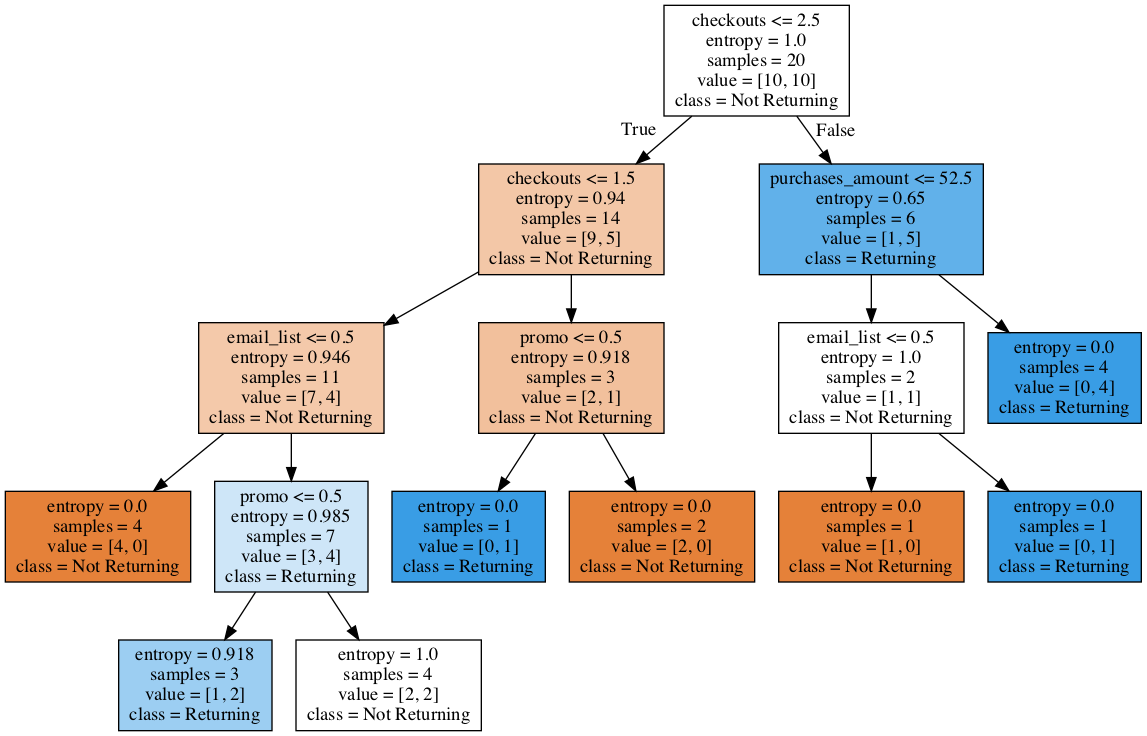

In [5]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Here we have a visualization of the tree we've trained. For every node it shows the rule being applied, the entropy in the dataset (1 being the most uncertain, 0 being totally certain), the samples remaining, the distribution of those samples, and the dominant class.

You can also follow trees. As you move down a tree to the left you are meeting the rule, to the right you are outside of the rule. So in the branches below the root node, all nodes to the left have a checkouts value less than or equal to 2.5 and all the nodes to the right have a checkouts value that isn't less than or equal to .2.5. You can follow this all the way down the tree, and the same is true for each new rule introduced at each node.

Note that we set a few parameters when we initialized our tree. Firstly, we wanted to use entropy to build the tree (criterion='entropy'), which follows the method we described above of looking for information gain. We also set max_features to 1, meaning only one feature will be used per node. We set the max_depth of the tree to 4, which means we only have four decision levels below the root for our classification.

We did something in this example that you wouldn't ever do when using decision trees for real: we set random_state to an arbitrary integer (1337). This classifier works by repeatedly splitting the training data randomly, which can lead to inconsistent trees. We're setting the random seed so the tree looks a specific way for this assignment, but you wouldn't do that when actually using this model.

## Why Decision Trees?
There are several reasons someone would want to use a decision tree. Some of the benefits include:

* Easy to represent the model visually
* Can handle varied types of data
* Feature selection is a part of the model
* Easy to use with little data preparation

However there are some key downsides to be aware of. Firstly there is a randomness to their generation, which can lead to variance in estimates. There is not a hard and fast rule to how the tree is built, so **it doesn't build the same way every time**. You saw this above when we discussed the `random_state` argument. In addition, **they are incredibly prone to overfitting**, particularly if you allow them to grow too deep or complex. Also note that because they are working from information gain, they are biased towards the dominant class, so **balanced data is needed**.

We used decision trees here as a classifier.

## Tinker
Spend a few minutes tinkering with this example and the arguments you pass into the model above. Remove the random_state argument and re-generate the tree a few times to see how random splitting changes your result. Change your max_depth to see how that affects things. Make sure you fully understand what each parameter does and what the tradeoffs are.

### Remove random_state

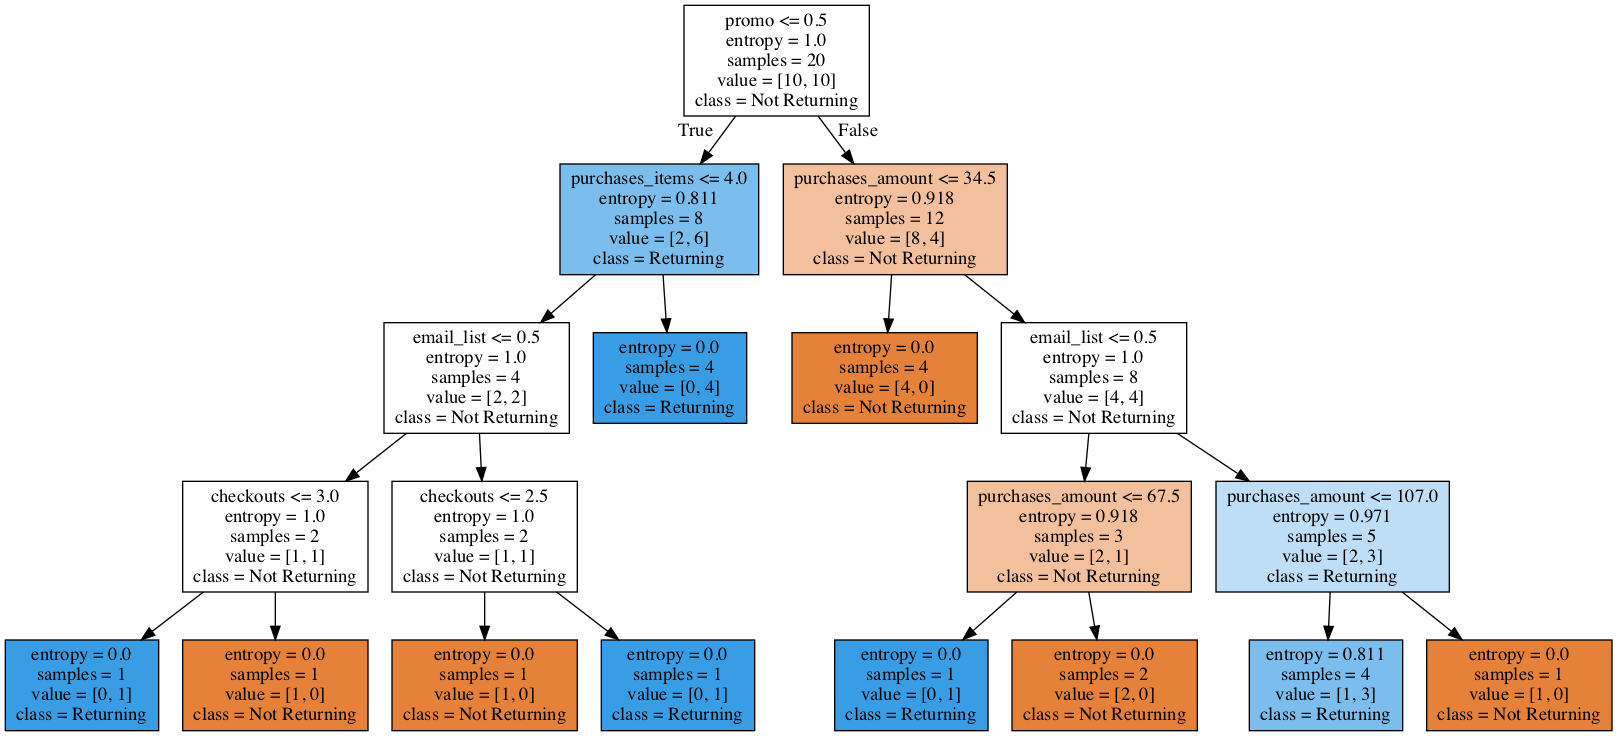

In [9]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Random splitting results in a new tree each time.

### Change max_depth

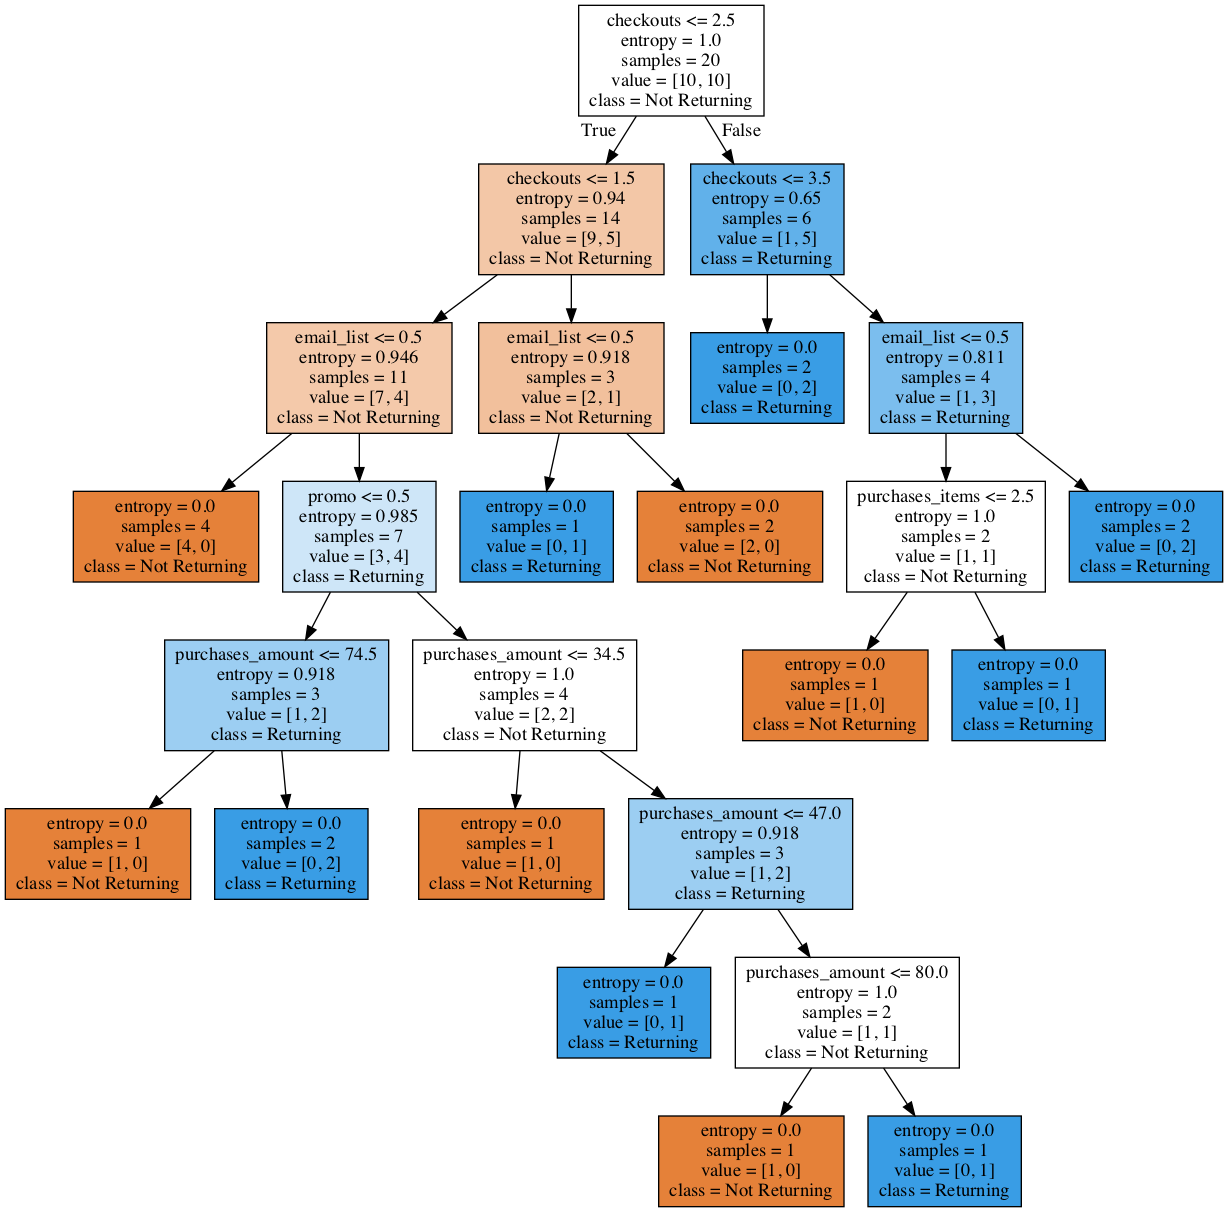

In [37]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=None,
    random_state=1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

max_entropy = 7 is the minimum required to identify every customer as 'Returning' or 'Not Returning' (all leaf nodes have entropy=0.0).

max_entropy = 3 identifies 13 out of the 20 customers (5 of 6 leaf nodes have entropy=0.0).

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

The lower the max_entropy the simpler and perhaps less accurate the model is (may be underfitted). The higher the max_entropy the more complex and perhaps accurate the model is (may be overfitted).

### Change max_features

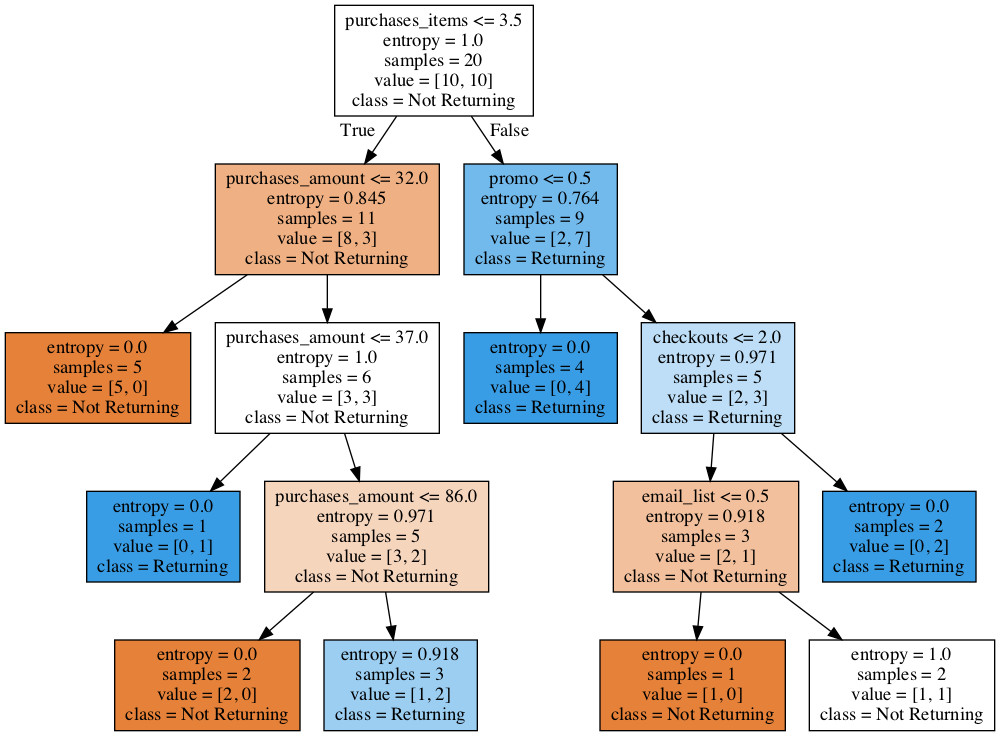

In [30]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=4,
    random_state=1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Changes the shape of the tree. In this example, I never saw more than one feature used per node regardless of the max_features value.

## Change criterion

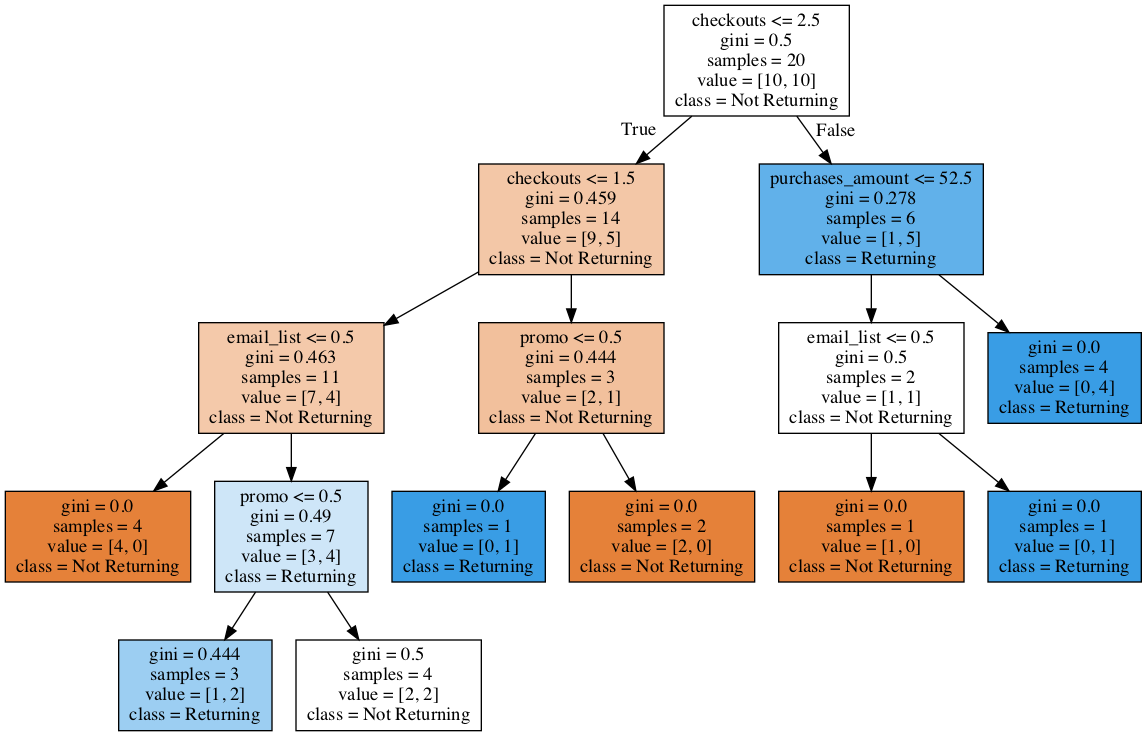

In [31]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=1,
    max_depth=4,
    random_state=1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

## Change splitter

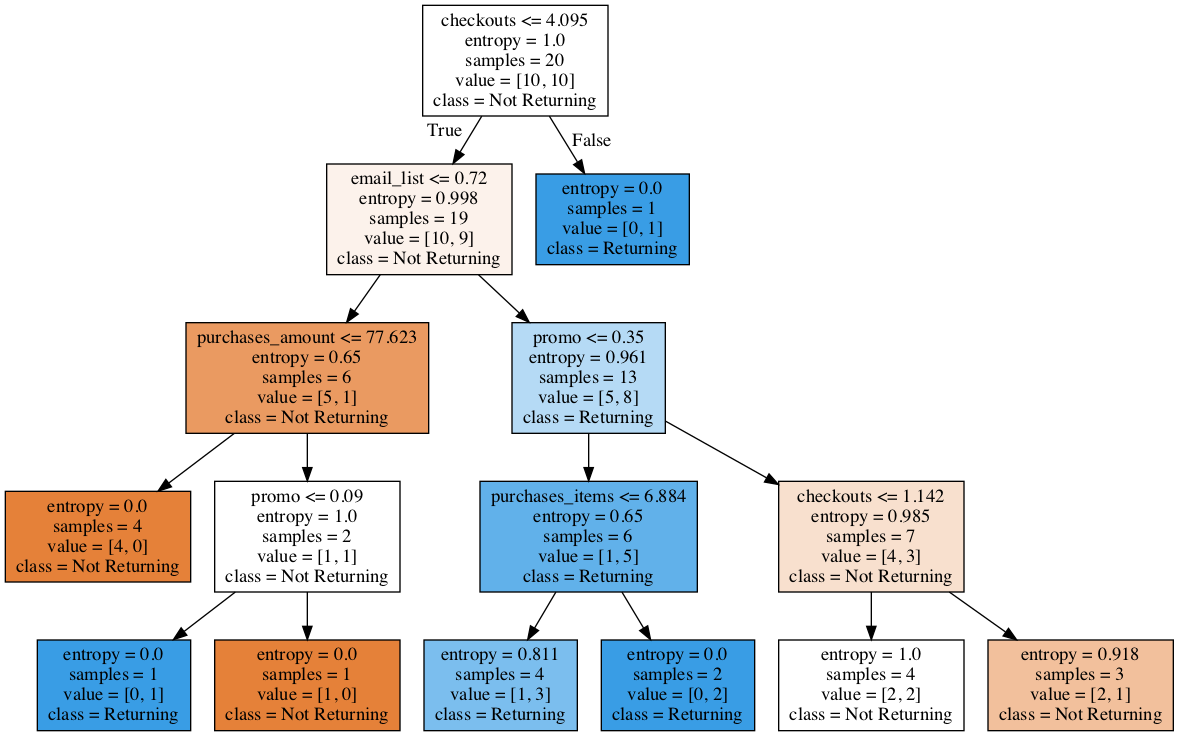

In [34]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_features=1,
    max_depth=4,
    random_state=1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.